# Machine Learning Project (Text-Based Gender Classification of Twitter Data using Naive Bayes and Support Vector Machine)
# Vocabulary or Bag of Words (BOW)
## Quintos, Maria Nikki H.
## Angeles, Angelic L.
## BSCS-ML COM 181

### 1.   Importing the modules, libraries, and dataset

A library is essentially a collection of modules that can be called and used and we can import the libraries by using 'import' to make use of the different functions. This part of the code imports modules and libraries to have access to the functions that we will be needing to build the classification model using Naive Bayes and SVM. Python libraries such as:

1. <b>Numpy</b> - works with arrays and matrices used for computation in the algorithm 
2. <b>Pandas</b> - works with data manipulation and analysis 
3. <b>Sklearn</b> - works with classification, clustering and regression
4. <b>Re</b> - works with regular expressions which are a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.
5. <b>Nltk</b> - known as natural language tool kit that works with human language data along with text processing libraries.

In [1]:
import pandas as pd
import numpy as np
import re

<b>Importing the dataset</b>

Data is raw information, it is the representation of both human and machine observation of the world. The dataset that you should used entirely depends on what type of problem you want to solve. This study is mainly focus on the gender classification problem and in this part of the code we are importing the dataset that we will used in the classification task. The dataset collected is from Kaggle. The dataset has 26 independent variables and 20,050 data. Since we are focusing on the text-based gender classification, we will only get the “gender” and “text” variables, where in the “text” represents the Twitter user’s tweets. 

In [2]:
# https://www.kaggle.com/rahulvks/gender-identification-analysis/notebook
# https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

url_train = 'https://raw.githubusercontent.com/mdeff/ntds_2016/master/project/reports/twitter_gender/gender-classifier-DFE-791531.csv'
data_with_duplicate = pd.read_csv(url_train, encoding='latin1')

### 2. Data Pre-Processing

We are living in the age of data and data are very significant when implementing machine learning algorithms since this is where the model gets all the information that they should process and learn. Data Pre-Processing is a technique to prepare the data to get more out of it. To have better and improved datasets that are cleaner and are more manageable to analyze and work with, we must apply this technique. The purpose of using this technique is to avoid noisy, inconsistent, and missing data that can lead to poor accuracy of the machine learning model. 

<b>Dropping the duplicates</b>

In this part of the code we are simply removing the duplicates from the DataFrame using the 'drop_duplicates' method and storing the new DataFrame with duplicate rows removed in the 'data' variable.

In [3]:
print(len(data_with_duplicate))
print(data_with_duplicate.columns)
#print(data_with_duplicate.shape)
data = data_with_duplicate.sort_values('text', ascending=True).drop_duplicates('text').sort_index()
print(len(data))

20050
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')
18412


<b>Getting the significant columns that we will used in the classification task and dealing with missing values</b>

The dataset will surely have missing and noisy data because the data gathering process is not perfect, so the dataset will have many irrelevant and missing parts. Data cleaning is one of the method that we should use to solve this problem. In this part of the code, we are only getting the significant columns that we will used in the classification task which are 'text' (independent variable) that represents the Twitter user's tweets and 'gender' (dependent variable) that represents if the Twitter user is a male or female. Then after getting the significant columns, we will find all the null values in the dataset and replace it with 'XXX' just so that we can easily distinguish if there is any null or missing values in the data. 

In [4]:
# only get the text and label.
data_text_label = data[['text', 'gender']]
print(data_text_label.head(5))

# sanity check of our data
if data_text_label['gender'].isnull().any():
  data_text_label['gender'] = data_text_label['gender'].fillna('XXX')
  print('cleaned')

                                                text  gender
0  Robbie E Responds To Critics After Win Against...    male
1  ÛÏIt felt like they were my friends and I was...    male
2  i absolutely adore when louis starts the songs...    male
3  Hi @JordanSpieth - Looking at the url - do you...    male
4  Watching Neighbours on Sky+ catching up with t...  female
cleaned


<ipython-input-4-52e004f9ebe3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text_label['gender'] = data_text_label['gender'].fillna('XXX')


<b>Data Cleaning</b>

One of the data preprocessing techniques is data cleaning, by applying this technique the model can improve the accuracy and performance of the machine learning model. The Regular Expression (RegEx) method is a faster process of cleaning text data that is simpler to use compared to manually splitting the strings. Regular Expressions (RegEx) are essentially text patterns that you can use to automate searching through and replacing elements within strings of text. We convert all strings into lowercase using '.lower()' method and in this case, we used 're.sub()' method to replace irrelevant and insignificant strings or characters in the 'text' or tweets of the users such as:
1. Converting all strings into lower case
2. Links and urls are removed
3. Remove all non-ASCII code
4. Remove all punctuations
5. Delete double spaces and replace with one space
6. Remove special characters
7. Remove numbers

In [5]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r"http\S+", "", s)
    encoded_string = s.encode("ascii", "ignore")
    s = encoded_string.decode()
    s = re.sub(r"[^a-zA-Z0-9]+", ' ', s)
    s = re.sub(' +', ' ', s)
    s = re.sub(r"\b\d+\b", "", s)
    s = re.sub(r'[0-9]+', '', s)
    return s
'''
def sample(s):
  return 'M'+s
'''

data_text_label['text'] = data_text_label.apply(lambda x: cleaning(x['text']), axis=1)
data_text_label.head(5)

<ipython-input-5-d036128efde5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text_label['text'] = data_text_label.apply(lambda x: cleaning(x['text']), axis=1)


,text,gender
0,robbie e responds to critics after win against...,male
1,it felt like they were my friends and i was li...,male
2,i absolutely adore when louis starts the songs...,male
3,hi jordanspieth looking at the url do you use ...,male
4,watching neighbours on sky catching up with th...,female


<b>Getting the stop words</b>

Now we will make use of the natural languange tool kit, this tool kit contain natural languange processing or text processing libraries. We will be downloading the list of stopwords from the nltk. Stop words are commonly used words (such as “the”, “a”, “an”, “in”) which does not add much meaning or weight to a sentence. They can be ignored without sacrificing the meaning of the sentence since sometimes irrelevant words and characters can cause the machine learning model to perform poorly.

In [6]:
pip install nltk

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Stop Words Removal</b> 

Stopwords are the most commonly used words. For the purpose of analyzing a text data and building Natural Languange Processing (NLP) models such as text-based gender classication model using Twitter data, these stopwords might not add much value or weight to the meaning of the text. For tasks like text classification, where the text is to be classified into different categories which is male or female, stopwords are removed or excluded from the given text so that more focus can be given to those words which focuses on and define the meaning of the text. After downloading the list of stop words, we will now import it from nltk to make use of it. We store the english stop words in the 'stop' variable and remove all stop words in the text. As you can see on the first print of the dataset there are still stop words in the text such as 'to', 'after', 'it', 'they', 'were', 'my', 'and', 'i', 'when', 'the', 'at', 'do', 'on', 'up', etc. But on the second print of the dataset, all the stop words have been removed already.

In [8]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
data_text_label['text'] = data_text_label['text'].str.lower().str.split()
print(data_text_label.head(5))
data_text_label['text'] = data_text_label['text'].apply(lambda x : [item for item in x if item not in stop])
print(data_text_label.head(5))

                                                text  gender
0  [robbie, e, responds, to, critics, after, win,...    male
1  [it, felt, like, they, were, my, friends, and,...    male
2  [i, absolutely, adore, when, louis, starts, th...    male
3  [hi, jordanspieth, looking, at, the, url, do, ...    male
4  [watching, neighbours, on, sky, catching, up, ...  female
                                                text  gender
0  [robbie, e, responds, critics, win, eddie, edw...    male
1  [felt, like, friends, living, story, retired, ...    male
2  [absolutely, adore, louis, starts, songs, hits...    male
3  [hi, jordanspieth, looking, url, use, ifttt, t...    male
4  [watching, neighbours, sky, catching, neighbs,...  female


<ipython-input-8-4d3aa581e88f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text_label['text'] = data_text_label['text'].str.lower().str.split()
<ipython-input-8-4d3aa581e88f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text_label['text'] = data_text_label['text'].apply(lambda x : [item for item in x if item not in stop])


<b>Analyzing the classes on the dependent variable</b>

In this code, we are getting the number of records or occurences in the 'gender' per class. As of now, there are 5 classes in the dependent variable which are female, male, brand or typically a type of product or business manufactured by a particular company under a particular name, unknown or users that are not identified, and XXX refers to the null or missing values. 

In [9]:
data_text_label['gender'].value_counts()
#data_text_label['gender'].isnull().values.any()

female     6573
male       6136
brand      4729
unknown     877
XXX          97
Name: gender, dtype: int64

<b>Removal of insignificant classes in 'gender' and checking if there are still missing values</b>

We remove the brand, unknown, and the missing or null values since we are only focused on the gender of the user which are male and female. Since gender carries rich and significant information concerning the male and female social activities. Then, we are checking if there are still any missing or null values and the output is 'False' meaning there are no missing values anymore.

In [10]:
data_text_label = data_text_label[data_text_label['gender'] != 'brand']
data_text_label = data_text_label[data_text_label['gender'] != 'unknown']
data_text_label = data_text_label[data_text_label['gender'] != 'XXX']
data_text_label['gender'].isnull().values.any()

False

<b>Checking the shape of the dataset</b>

After doing lots of data pre-processing techniques, we are just checking the shape of the dataset. Since we remove the 3 insignificant classes from 'gender' which are brand, unknown, and missing or null values. We remove the stopwords, duplicate records, and other insignificant values and noise in our data. The shape of our dataset is now (12709, 2) since there are 12709 records and 2 columns which are the gender and text because we are dealing with a text-based gender classifcation task.

In [11]:
data_text_label['gender'].value_counts()
data_text_label.shape

(12709, 2)

<b>Converting values of 'gender' from string to int</b>

In order to implement the machine learning models which are Naive Bayes and SVM from the dataset. The values of the data should be integer so that the model can process it. Since computer and machines cannot process strings but integers only. So we will convert 'Male' to 1 and 'Female' to 0 then store it in 'gender'.

In [12]:
def convert_gender(v):
  if v == 'male':
    return 1
  elif v == 'female':
    return 0

data_text_label['gender'] = data_text_label.apply(lambda x: convert_gender(x['gender']), axis=1)

Now we can see that the gender column has now integer values instead of string. 0 which represents 'Female' and 1 which represents 'Male'. 

In [13]:
data_text_label.head(5)

,text,gender
0,"[robbie, e, responds, critics, win, eddie, edw...",1
1,"[felt, like, friends, living, story, retired, ...",1
2,"[absolutely, adore, louis, starts, songs, hits...",1
3,"[hi, jordanspieth, looking, url, use, ifttt, t...",1
4,"[watching, neighbours, sky, catching, neighbs,...",0


This part of the code converts the list of words into space-separated strings.

In [14]:
# This converts the list of words into space-separated strings
data_text_label['text'] = data_text_label['text'].apply(lambda x: ' '.join(x))
data_text_label.head(5)

,text,gender
0,robbie e responds critics win eddie edwards wo...,1
1,felt like friends living story retired ian,1
2,absolutely adore louis starts songs hits hard ...,1
3,hi jordanspieth looking url use ifttt typicall...,1
4,watching neighbours sky catching neighbs xxx xxx,0


### 3. Application of CountVectorizer and TfidfVectorizer

<b>Bag of Words (BOW)</b> is a representation of text that describes the occurrence of words within a document or text. It involves two things: 
1. A vocabulary of known words
2. A measure of the presence of known words.

Now that the data is pre-processed and cleaned already. We can now head on to the next step which is applying feature extraction by using CountVectorizer and TfidfTransformer.
1. <b>CountVectorizer</b> - counts the number of times a word appears in the text. It tokenize a collection of text and build a vocabulary of known words, but also to encode new documents using that vocabulary.
2. <b>TFIDFVectorizer</b> - is the overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents. Tfidf stands for Tf (Term Frequency) and Idf (Inverse Document Frequency) which means:

    1. <b>Term Frequency</b> - summarizes how often a given word appears within a document.
    2. <b>Inverse Document Frequency</b> - downscales words that appear a lot across documents.

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

# https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
counts = count_vect.fit_transform(data_text_label['text'])
#print(count_vect.get_feature_names())
#print(len(count_vect.get_feature_names()))


from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)
counts = transformer.transform(counts)    
#print(counts)

# Raw Dataset Accuracy

### 4. Implementation of Gender Classification using SVM and Naive Bayes

In this gender classification task, we will be implementing two machine learning algorithms which are:
1. <b>SVM (Support Vector Machine)</b> - is a supervised machine learning algorithm used for classification and regression problems. However, SVM is used most likely in classification problems. SVM works by plotting each data item as a point in n-dimensional space (where n is the number of features or independent variables that the dataset has) with the value of a particular coordinate which is the value of each feature. Then, perform classification by finding the hyper-plane that differentiates the two classes very well.
2. <b>Naive Bayes</b> - is a powerful probabilistic machine learning algorithm that is used for classification. Naive Bayes works by using the Bayes’ Theorem which is predicting the probabilities for each class such as the probability of that given record or data point belongs to a particular class. The class or category with the highest probability is considered as the most likely class. This study will specifically implement Multinomial Naive Bayes, the only difference of it with Naive Bayes is that it is a multinomial distribution which requires integer feature counts, rather than some other distribution. This works well and is suitable for classification with discrete features, such as word counts in text which is one of the features.

<b>Splitting the dataset into training data and testing data</b>

First step is of course we need to split the dataset into training data and testing data. In this case we set the test size as 25% making the training size 75% and adjusted the 'random_state' to 69 since it is the optimal value. 
1. <b>Training data</b> - is used to fit the machine learning model.
2. <b>Testing data</b> - is used to evaluate the fit machine learning model.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, data_text_label['gender'], test_size=0.25, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

male_count = 0
female_count = 0

for i in y_test:
    if(i==1):
        male_count+=1
    else:
        female_count+=1

        
        
print("Testing Data")
print("Male  Count: ", male_count)
print("Female Count: ", female_count)

male_count = 0
female_count = 0

for i in y_train:
    if(i==1):
        male_count+=1
    else:
        female_count+=1

        
        
print("Training Data")
print("Male  Count: ", male_count)
print("Female Count: ", female_count)

(9531, 24461)
(3178, 24461)
(9531,)
(3178,)
Testing Data
Male  Count:  1525
Female Count:  1653
Training Data
Male  Count:  4611
Female Count:  4920


After splitting the dataset into training data and testing data, we will now proceed in training the training data and fit it in the Support Vector Machine (SVM) model specifically in the Support Vector Classification (SVC). The parameters used in SVM are the following:
1. <b>C</b> - is the regularization parameter. The strength of the regularization is inversely proportional to C. The value of C is set to its default value which is 1.0 since it is the optimal value in this case. 
2. <b>kernel</b> - is the kernel type to be used in the algorithm. The kernel that we used is 'linear' since the data can be linearly separable.

After fitting the training data into the SVM model, we will now proceed to prediction of outcomes using the testing data. Then, we will get the obtained accuracy score from the SVM model that we created which is 59%.

In [17]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)


# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  59.093769666456886
Accuracy: 0.590938
Precision: 0.577533
Recall: 0.549508
F1 score: 0.563172


In [18]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1040,613
1,687,838


After implementing the gender classification task using Support Vector Machine (SVM), we will now implement it using Naive Bayes specifically Multinomial Naive Bayes since it works well on discrete features, such as word counts in text. The parameter used in Multinomial Naive Bayes is:
1. <b>alpha</b> - is the smoothing parameter (0 for no smoothing). In this case, we used the default value of '1.0' since it is the optimal value. 

We will now create the Multinomial Naive Bayes model by training the training data and fit it in the Multinomial Naive Bayes model. 

In [19]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)


After fitting the training data into the Multinomial Naive Bayes model, we will now proceed to prediction of outcomes using the testing data. Then, we will get the obtained accuracy score from the Multinomial Naive Bayes model that we created which is 61%.

In [20]:
import numpy as np

predicted = model.predict(X_test)

print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  0.6085588420390182
Accuracy: 0.608559
Precision: 0.626920
Recall: 0.455082
F1 score: 0.527356


In [21]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1240,413
1,831,694


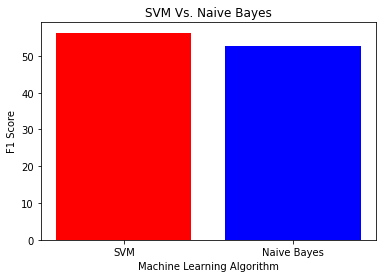

In [22]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()

Then in this part of the code, we are just printing the confusion matrix to evaluate the accuracy of a classification. 

# Parameter Tuning

In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

SVM = svm.SVC(C=10.0, kernel='linear')
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)


# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  57.36312146003776
Accuracy: 0.573631
Precision: 0.555995
Recall: 0.553443
F1 score: 0.554716


In [24]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=10.0).fit(X_train, y_train)
import numpy as np

predicted = model.predict(X_test)

print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  0.5707992448080553
Accuracy: 0.570799
Precision: 0.669474
Recall: 0.208525
F1 score: 0.318000


### Testing the prediction of the model based on an input or sample tweet 

<b>SVM Gender Predictor</b>

This method is created to test the prediction of the gender classication model using Support Vector Machine (SVM).

In [25]:
def SVMGenderPredictor(a):
    sample_tweet = [a]
    vector = count_vect.transform(sample_tweet).toarray()
    if SVM.predict(vector) == 0:
        print("Female")
    else:
        print("Male")

In this case, we are testing the prediction of the gender classification model from an input of sample tweet using the Support Vector Machine (SVM) algorithm. The model predicted that if the user tweeted "Lebron James is the MVP of Lakers", it is predicted to Male. On the other hand, if the user tweeted "I love shopping", it is predicted to Female.

In [26]:
SVMGenderPredictor("Lebron James is the MVP of Lakers")
SVMGenderPredictor("I love shopping")

Male
Female


<b>Multinomial Naive Bayes Gender Predictor</b>

This method is created to test the prediction of the gender classication model using Multinomial Naive Bayes.

In [27]:
def NBGenderPredictor(a):
    sample_tweet = [a]
    vector = count_vect.transform(sample_tweet).toarray()
    if model.predict(vector) == 0:
        print("Female")
    else:
        print("Male")

In this case, we are testing the prediction of the gender classification model from an input of sample tweet using the Mutinomial Naive Bayes algorithm. The model predicted that if the user tweeted "We will watch football game tonight", it is predicted to Male. On the other hand, if the user tweeted "I love one direction", it is predicted to Female.

In [28]:
NBGenderPredictor("We will watch football game tonight")
NBGenderPredictor("I love one direction")

Male
Female


### 5. Application of Pre-Processing Techniques 

More pre-processing techniques are applied for experimentation to analyze which will increase the accuracy and performance of each model since many machine learning algorithms perform better when features are on a similar scale and near to normally distributed. The pre-processing techniques performed in the two machine learning models which are Multinomial Naive Bayes and Support Vector Machine (SVM) are:
1. <b>StandardScaler</b> - standardize features by removing the mean and scaling to unit variance
2. <b>MaxAbsScaler</b> - scale each feature by its maximum absolute value.
3. <b>Normalizer</b> - normalize samples individually to unit norm.

# Standard Scaler

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, data_text_label['gender'], test_size=0.25, random_state=69)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma="auto", class_weight = None)
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)



# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  54.53115166771555
Accuracy: 0.545312
Precision: 0.531646
Recall: 0.440656
F1 score: 0.481893


In [30]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1061,592
1,853,672


In [31]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, data_text_label['gender'], test_size=0.25, random_state=69)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

import numpy as np

predicted = model.predict(X_test)



print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  57.55191944619258
Accuracy: 0.575519
Precision: 0.562323
Recall: 0.520656
F1 score: 0.540688


In [32]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1061,592
1,853,672


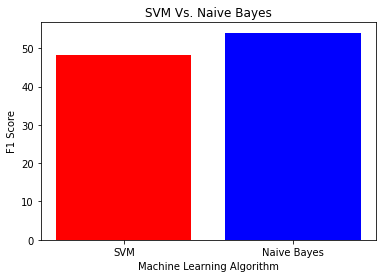

In [33]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()

# MaxAbs Scaler

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, data_text_label['gender'], test_size=0.25, random_state=69)

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma="auto", class_weight = None)
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)



# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  58.24417872876023
Accuracy: 0.582442
Precision: 0.567439
Recall: 0.546230
F1 score: 0.556632


In [35]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1018,635
1,692,833


In [36]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)

import numpy as np

predicted = model.predict(X_test)


print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  59.943360604153554
Accuracy: 0.599434
Precision: 0.598284
Recall: 0.502951
F1 score: 0.546491


In [37]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1138,515
1,758,767


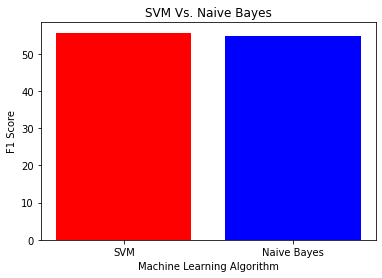

In [38]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()

# Normalizer with Standard Scaler

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, data_text_label['gender'], test_size=0.25, random_state=69)

from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma="auto", class_weight = None)
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)


# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)



SVM Accuracy Score ->  54.53115166771555
Accuracy: 0.545312
Precision: 0.531646
Recall: 0.440656
F1 score: 0.481893


In [40]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1061,592
1,853,672


In [41]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)

import numpy as np

predicted = model.predict(X_test)



print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  57.55191944619258
Accuracy: 0.575519
Precision: 0.562323
Recall: 0.520656
F1 score: 0.540688


In [42]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1035,618
1,731,794


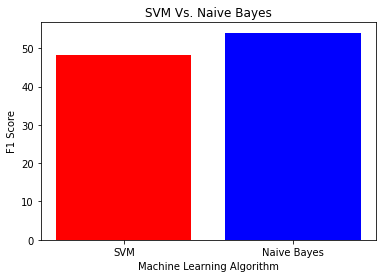

In [43]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()